# 元となるデータを作る関数たち

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [19]:
def cropImage(img, center_x, center_y, height, width):
    left = center_x - int(width/2)
    upper = center_y - int(height/2)
    right = center_x + int(width/2)
    lower = center_y + int(height/2)
    #c_img = img.crop((left, upper, right, lower))
    c_img = img[upper:upper+height, left:left+width]
    carr = np.asarray(c_img)
    carr = carr.flatten()
    carr = np.asarray(carr).astype(np.float32)
    return np.array(carr, dtype=np.float32)/255

def random_crop(img, DATA_NUM):
    image_list = np.empty(28*28,dtype=np.float32)
    labels = np.empty(2,dtype=np.float32)
    for n in range(DATA_NUM):
        # choice 14 <= x <= 126 && 14 <= y <= 42
        randx = np.random.rand()*112 + 14
        randy = np.random.rand()*28 + 14
        c_image = cropImage(img, int(randx), int(randy), 28, 28)
        image_list = np.vstack((image_list, c_image))
        labels = np.vstack((labels,[randx/(28*5), randy/(25*2)]))
    image_list = np.delete(image_list, 0,axis=0)
    labels = np.delete(labels,0, axis=0)
    return image_list, labels

def dispTrainData(o_img, c_img, label):
    plt.clf()
    img = o_img.copy()
    x = int(label[0]*28*5)
    y = int(label[1]*28*2)
    #print(x)
    #print(y)
    pixels = (c_img * 256).reshape((28, 28))
    plt.imshow( pixels)
    plt.show()
    #plt.axis("off")
    #plt.show()
    #d = ImageDraw.Draw(img)
    #d.ellipse([x-1, y-1, x+1, y+1])
    cv2.rectangle(img,(x-14,y-14),(x+14,y+14), (0,255,0))
    plt.imshow(img)
    plt.show()
    #, fill=(0,192,192), outline=(0,192,192)
    # (x+14,y+14)],outline=(0,192,192)

In [6]:
# read iamge
#original_img = Image.open("images/inu.png").convert("L")
original_img = cv2.imread('images/inu.png', cv2.IMREAD_GRAYSCALE)

# create data
train_im, train_la = random_crop(original_img, 600000)
print('train data finish')
test_im, test_la = random_crop(original_img, 10000)

# concate images and labels [image axis]
inu_train = [(x, y) for x, y in zip(train_im, train_la)]

# output csv data
with open('inu_train.pickle', mode='wb') as f:
    pickle.dump(inu_train, f)
with open('inu_test.pickle', mode='wb') as f:
    pickle.dump(inu_train, f)

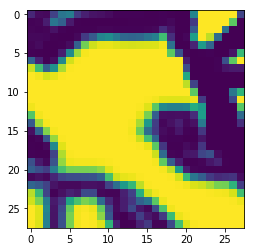

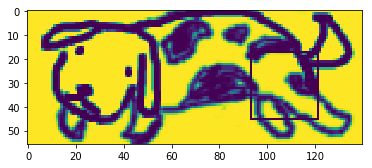

[0.10980392 0.02745098 0.02352941 0.19215687 0.3882353  0.42352942
 0.16862746 0.08627451 0.05098039 0.04313726 0.02745098 0.00784314
 0.00784314 0.00784314 0.00784314 0.00392157 0.00392157 0.00784314
 0.00392157 0.         0.         0.4509804  1.         1.
 1.         1.         1.         0.20392157 0.00784314 0.01176471
 0.07843138 0.3882353  0.30588236 0.07058824 0.00392157 0.
 0.         0.         0.         0.         0.         0.00392157
 0.00392157 0.00392157 0.00392157 0.00784314 0.01960784 0.
 0.         0.16862746 1.         1.         1.         1.
 0.7490196  0.         0.01176471 0.00784314 0.01176471 0.04705882
 0.00784314 0.         0.00392157 0.00392157 0.00392157 0.01176471
 0.01176471 0.00784314 0.00784314 0.00784314 0.00784314 0.01176471
 0.01960784 0.1254902  0.04705882 0.         0.         0.28235295
 1.         1.         1.         0.37254903 0.         0.
 0.01960784 0.01960784 0.01568628 0.00392157 0.         0.
 0.01960784 0.16862746 0.2784314  0.4549019

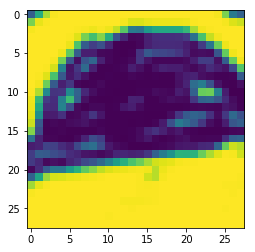

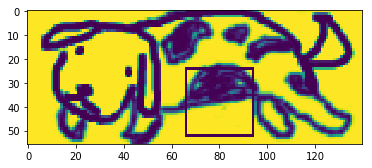

[0.29803923 0.6156863  0.8745098  0.99215686 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.9882353  0.8039216  0.4117647  0.3137255  0.8        0.96862745
 0.99607843 1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.9882353  0.9490196
 0.94509804 0.9647059  0.972549   0.972549   0.972549   0.972549
 0.9764706  0.99607843 1.         1.         1.         0.9882353
 0.9490196  0.92156863 0.9882353  1.         1.         1.
 1.         1.         0.99607843 0.9882353  0.9764706  0.99215686
 0.9764706  0.9098039  0.7411765  0.4117647  0.3882353  0.5411765
 0.6        0.6039216  0.6039216  0.60784316 0.6666667  0.87058824
 0.98039216 0.99607843 1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99607843
 0.9529412  0.79607844 0.7019608  0.8156863  0.62352943 

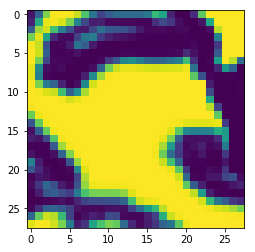

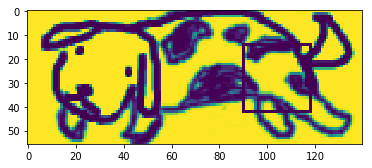

[0.05490196 0.30588236 0.80784315 0.99215686 1.         0.9882353
 0.91764706 0.7254902  0.39215687 0.2        0.2901961  0.34509805
 0.34901962 0.34901962 0.34901962 0.39607844 0.67058825 0.5921569
 0.09803922 0.         0.         0.1254902  0.7490196  1.
 1.         1.         1.         1.         0.08627451 0.6117647
 0.9647059  0.9843137  0.94509804 0.8        0.44705883 0.21568628
 0.07450981 0.08627451 0.02352941 0.01960784 0.01960784 0.01960784
 0.01568628 0.01568628 0.13725491 0.22745098 0.15686275 0.03529412
 0.         0.         0.05098039 0.59607846 1.         1.
 1.         1.         0.28627452 0.85490197 0.9372549  0.7019608
 0.4392157  0.2509804  0.07450981 0.07058824 0.21176471 0.36862746
 0.2901961  0.2627451  0.2509804  0.19215687 0.07058824 0.01960784
 0.02352941 0.02352941 0.01568628 0.01960784 0.02352941 0.
 0.         0.03921569 0.9019608  1.         1.         1.
 0.7882353  0.95686275 0.5921569  0.10980392 0.02745098 0.02352941
 0.19215687 0.3882353  0.423529

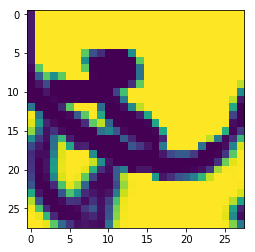

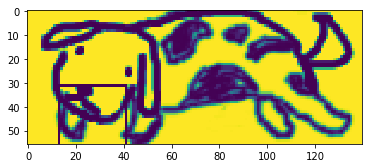

[0.07058824 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.07058824 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.07058824 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.07058824 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         

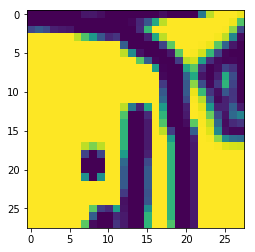

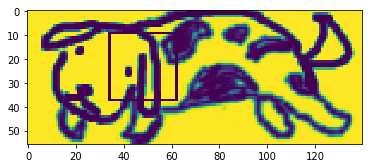

[0.         0.         0.         0.         0.         0.
 0.         0.05882353 0.0627451  0.03529412 0.         0.
 0.         0.         0.         0.         0.         0.03529412
 0.         0.         0.         0.         0.4        0.9019608
 1.         1.         1.         0.9764706  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01568628
 0.10980392 0.27058825 0.6039216  0.9019608  1.         1.
 1.         1.         1.         1.         1.         1.
 0.98039216 0.7294118  0.21176471 0.28235295 0.22352941 0.08627451
 0.07058824 0.05882353 0.         0.         0.         0.
 0.         0.         0.         0.         0.11764706 0.6745098
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99607843 0.83137256 0.21568628
 1.         1.         1.         1.         1.         1.
 0.9019608  0.7254902  0.54509807 0.27058825 0.10980392 0.14901961
 0

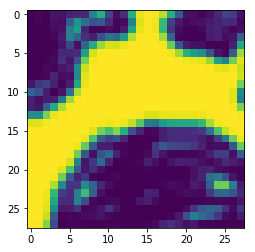

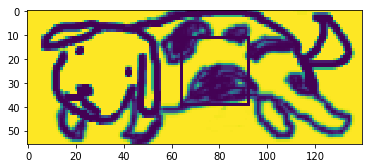

[0.00392157 0.01176471 0.00392157 0.05882353 0.04705882 0.09803922
 0.10980392 0.10588235 0.44705883 0.6313726  0.20784314 0.03921569
 0.1254902  0.6313726  0.972549   1.         0.99607843 0.9019608
 0.627451   0.28235295 0.04313726 0.03137255 0.01568628 0.04313726
 0.10980392 0.2        0.1764706  0.04313726 0.00392157 0.01176471
 0.00392157 0.04313726 0.03921569 0.2901961  0.5176471  0.35686275
 0.25490198 0.28235295 0.11764706 0.01176471 0.02745098 0.43529412
 0.9490196  1.         0.9764706  0.6745098  0.19215687 0.06666667
 0.01568628 0.03529412 0.04705882 0.07058824 0.09803922 0.12941177
 0.10980392 0.01960784 0.00392157 0.00392157 0.00392157 0.02745098
 0.04705882 0.43529412 0.56078434 0.09803922 0.00784314 0.01176471
 0.03137255 0.01568628 0.07450981 0.58431375 0.96862745 1.
 0.9764706  0.6666667  0.15686275 0.03137255 0.00392157 0.00392157
 0.01960784 0.08235294 0.09803922 0.05098039 0.01176471 0.03921569
 0.00392157 0.         0.         0.01176471 0.07843138 0.43529412
 0.3

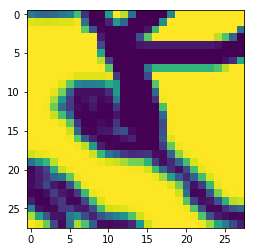

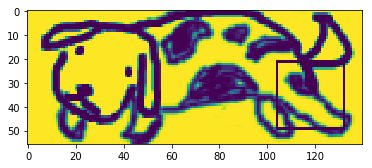

[0.40784314 0.33333334 0.32156864 0.33333334 0.38431373 0.43137255
 0.69411767 0.13333334 0.         0.01568628 0.56078434 1.
 0.9019608  0.36078432 0.         0.         0.         0.
 0.44705883 1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.9529412  0.9411765
 0.9372549  0.9411765  0.94509804 0.9490196  0.98039216 0.3764706
 0.         0.         0.09803922 0.54509807 0.3254902  0.
 0.         0.         0.         0.49803922 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.7490196  0.2509804  0.01176471
 0.         0.00392157 0.00784314 0.         0.         0.05098039
 0.6745098  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.37254903
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.07450981 0.         0.
 0.       

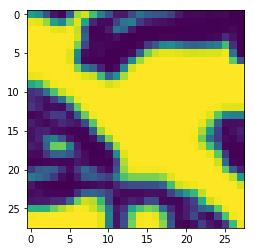

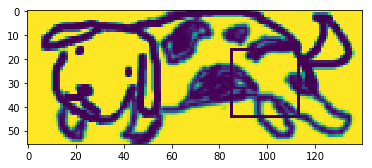

[0.5568628  0.5019608  0.24705882 0.05098039 0.01568628 0.28627452
 0.85490197 0.9372549  0.7019608  0.4392157  0.2509804  0.07450981
 0.07058824 0.21176471 0.36862746 0.2901961  0.2627451  0.2509804
 0.19215687 0.07058824 0.01960784 0.02352941 0.02352941 0.01568628
 0.01960784 0.02352941 0.         0.         0.972549   0.9607843
 0.84313726 0.57254905 0.4509804  0.7882353  0.95686275 0.5921569
 0.10980392 0.02745098 0.02352941 0.19215687 0.3882353  0.42352942
 0.16862746 0.08627451 0.05098039 0.04313726 0.02745098 0.00784314
 0.00784314 0.00784314 0.00784314 0.00392157 0.00392157 0.00784314
 0.00392157 0.         1.         1.         0.99607843 0.96862745
 0.95686275 0.9882353  0.9137255  0.2509804  0.00784314 0.01176471
 0.07843138 0.3882353  0.30588236 0.07058824 0.00392157 0.
 0.         0.         0.         0.         0.         0.00392157
 0.00392157 0.00392157 0.00392157 0.00784314 0.01960784 0.
 1.         1.         1.         1.         1.         1.
 0.92941177 0.30980393

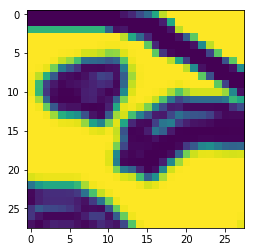

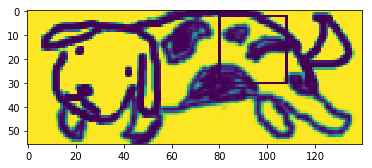

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.05882353 0.10980392 0.22352941 0.34117648 0.6039216  0.9019608
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.07843138 0.59607846 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.654902   0.654902   0.654902   0.654902
 0.654902   0.654902   0.654902   0.654902   0.654902   0.654902
 0.32156864 0.04313726 0.05882353 0.         0.         0.
 0.         0.         0.05882353 0.9019608  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.9019608  0.6039216  0.3372549  0.1

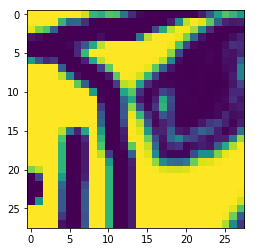

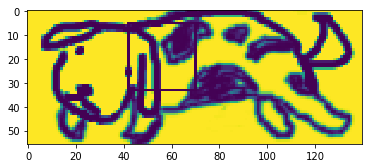

[1.         1.         1.         1.         1.         1.
 0.99607843 0.9372549  0.6666667  0.62352943 0.7294118  0.7019608
 0.38431373 0.11764706 0.01960784 0.         0.         0.
 0.         0.         0.         0.         0.07450981 0.26666668
 0.5647059  0.7254902  0.65882355 0.53333336 1.         1.
 1.         0.99215686 0.65882355 0.3137255  0.32941177 0.13333334
 0.00392157 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07058824 0.47843137
 0.9019608  0.99607843 0.9607843  0.7490196  0.30980393 0.10196079
 0.07058824 0.08235294 0.9647059  0.8039216  0.7254902  0.30980393
 0.00784314 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.22745098 0.6039216  0.9019608  1.         0.9882353  0.8627451
 0.5058824  0.12941177 0.00784314 0.         0.00392157 0.
 0.0627451  0.03529412 0.         0.         0.         0.
 0.         0.         0.         0.03529412 0.         0.
 0

In [20]:
# check csv data
'''
with open('inu_train.pickle', mode='rb') as f:
    data = pickle.load(f)
#print(data[0:3][0])
#print(data[0][1].shape)


datanum = 10
for t in range(datanum):
    dispTrainData(original_img, data[t][0], data[t][1])
    print(data[t][0])
'''